  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

SSIM: 0.998081083834081
MSE: 125.33940972222223
Luminance: 0.9980810838340811
Contrasto: 1.0
()
Structure: -0.9747487340293645


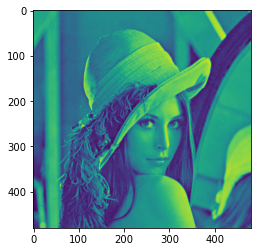

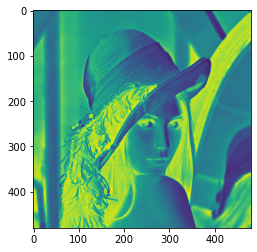

In [20]:
from PIL import Image, ImageOps 
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt

# creating a image1 object 
lena = Image.open("lena.png") 
 
# applying greyscale method 
lena = ImageOps.grayscale(lena) 
lena_array_1=asarray(lena) 

#lena = lena.convert("1") 
lena_array_2=asarray(lena.copy()) 
array=np.array(lena_array_2)
print(array.flags)

array=255-array

def MSE(x,y):
    return np.mean((x-y)**2)


def SSIM(x,y):
    MAX_LEVEL=255
    k1=0.01
    k2=0.03
    mu_x = np.mean(x)
    mu_y=np.mean(y)
    var_x=np.var(x)
    var_y=np.var(y)
    cov_xy=np.cov(x,y)
    c1=(k1*MAX_LEVEL)**2
    c2=(k2*MAX_LEVEL)**2
    return ((2*mu_x*mu_y+c1)*(2*var_x**0.5*var_y**0.5+c2))/((mu_x**2+mu_y**2+c1)*(var_x+var_y+c2))



def Luminance(x,y):
    MAX_LEVEL=255
    
    mu_x = np.mean(x)
    mu_y=np.mean(y)
    k1=0.01
    #k2=0.03
    c1=(k1*MAX_LEVEL)**2
    #c2=(k2*MAX_LEVEL)**2
    
    return (2*mu_x*mu_y+c1)/(mu_x**2+mu_y**2+c1)


def Contrasto(x,y):
    MAX_LEVEL=255
    
    var_x=np.var(x)
    var_y=np.var(y)
    k2=0.03
    c2=(k2*MAX_LEVEL)**2
    
    return (2*var_x**0.5*var_y**0.5+c2)/(var_x+var_y+c2)


def Structure(x,y):
    MAX_LEVEL=255
    
    cov_xy=np.cov(x.flat,y.flat)[0][1]
    print(cov_xy.shape)
    var_x=np.var(x)
    var_y=np.var(y)
    k2=0.03
    c2=(k2*MAX_LEVEL)**2
    
    return (cov_xy+c2/2)/(var_x**0.5*var_y**0.5+c2/2)



print("SSIM:",SSIM(lena_array_1,array))
print("MSE:",MSE(lena_array_1,array))

print("Luminance:",Luminance(lena_array_1,array))

print("Contrasto:",Contrasto(lena_array_1,array))

print("Structure:",Structure(lena_array_1,array))


plt.imshow(lena_array_1)
plt.show()
plt.imshow(array)
#lena_array_2[0][0]=0



In [165]:
### GOLOMB
def truncate(val, numbits):
    return val & (2**numbits - 1)

def G_m(n,m):
    
    
    c_=int(np.floor(n/m))
    cod_unario=0
    if c_==0:
        cod_unario=str(0)
    else:
        cod_unario=(str(1)*c_+str(0))
    
    #print("Codice unario ",cod_unario)
    k=np.ceil(np.log2(m))
    c=np.power(2,k)-m
    
    #print("c unario",cod_unario)
    #print("k: ",k)
    # print("c: ",c)
    # print("r: ",r)
    # print("c: ",r)
    
    res=""
    if (int(n%m)>=0 and int(n%m)<c):    
        #print("else")
        res=truncate(n%m,int(k-1))
    else:
        if(k != 0):
            res=truncate(int(n%m+c),int(k))
            res=bin(res)[int(k):]
            #print(n%m+c)
            if res[0]=='b':
                res=res[1:]
    finale=cod_unario+str(res)
    
    return finale

for i in range(10):
    print(G_m(i,1))
for i in range(10):
    print(G_m(i,4))


0
10
110
1110
11110
111110
1111110
11111110
111111110
1111111110
00
01
010
011
100
101
1010
1011
1100
1101


In [281]:
### CODIFICA ARITMETICA
import numpy as np

alfabeto={'A':0.4,'B':0.5,'#':0.05,'F':0.05}
input_da_codificare="BBBF#"

alfa=list(alfabeto.keys())
prob=list(alfabeto.values())
max_r=1
min_r=0
#range_r=max_r-min_r
#intervals=prob*range_r
reg=np.cumsum(prob)+min_r ## first cumulative


for character in input_da_codificare:
    print("Carattere ->",character)
    index_r=alfa.index(character)
    print("Prob ->",reg[index_r])
    #print(reg[index_r-1])
    max_r=reg[index_r]
    min_r=reg[index_r-1]
    print(min_r,max_r)
    intervals=np.array(prob)*(max_r-min_r)
    reg=np.cumsum(intervals)+min_r
    print("Reg",reg)
    
    
print("Finale {:f}".format(min_r))
#print(interval)


Carattere -> B
Prob -> 0.9
0.4 0.9
Reg [0.6   0.85  0.875 0.9  ]
Carattere -> B
Prob -> 0.8500000000000001
0.6000000000000001 0.8500000000000001
Reg [0.7    0.825  0.8375 0.85  ]
Carattere -> B
Prob -> 0.8250000000000001
0.7000000000000001 0.8250000000000001
Reg [0.75    0.8125  0.81875 0.825  ]
Carattere -> F
Prob -> 0.8250000000000001
0.8187500000000001 0.8250000000000001
Reg [0.82125   0.824375  0.8246875 0.825    ]
Carattere -> #
Prob -> 0.8246875
0.8243750000000001 0.8246875
Reg [0.8245     0.82465625 0.82467188 0.8246875 ]
Finale 0.824375


In [ ]:
### MORFOLOGIA

array([0.6 , 0.85, 0.9 ])